# Wk3_Notebook (Basic statistical analysis using Python)

In this Notebook, I will show you how you can use several libraries from the Python ecosystem to perform some widely used statistical tests. More specifically, the following topics will be discussed:
- [Developing a routine for exploring a new dataset](#Wk3_a)
- [Univariate statistics](#Wk3_b)
- [Bivariate statistics](#Wk3_c)
- [Potential remedies for violation of the normality assumption](#Wk3_d)
- [Application of basic statistical analysis - Anomaly detection](#Wk3_e)

The tests will mostly be illustrated using the 'tips' dataset that is included in the seaborn library.

In [1]:
# Import the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the data

df_tips = sns.load_dataset('tips')

## Developing a routine for exploring a new dataset <a name="Wk3_a"></a>

Although there is no standard approach when beginning a data analysis, it is typically a good idea to develop a routine for yourself when first examining a dataset. This routine can manifest itself as a dynamic checklist of tasks that evolves as your familiarity with pandas and data analysis expands. This checklist of tasks will typically entail examining both metadata and descriptive statistics in a routine and systematic way, where metadata describes the dataset (or, more aptly, data about the data) and (univariate) descriptive statistics are summary statistics about variables (columns) of the dataset. Experienced data analysts generally recommend to at least examine the following aspects of a new dataset:
- a sample of rows with the `head()`, `tail()` and `sample()` methods.
- the dimensionality with the `shape` attribute.
- general information including the index dtype and columns, non-null values and memory usage with the `info()` method.
- summary statistics for the numerical, object (string) and/or categorical columns with the `describe()` method.  

But examining additional aspects may also be helpful, including:
- the column names with the `columns` attribute.
- the unique values for the categorical variables with the `select_dtypes()` method.

In [3]:
# Display a sample of rows

#df_tips.head()  # for the first five rows
#df_tips.tail()  # for the last five rows
df_tips.sample(5, random_state=123)  # for five random rows

,total_bill,tip,sex,smoker,day,time,size
112,38.07,4.00,Male,No,Sun,Dinner,3
19,20.65,3.35,Male,No,Sat,Dinner,3
187,30.46,2.00,Male,Yes,Sun,Dinner,5
169,10.63,2.00,Female,Yes,Sat,Dinner,2
31,18.35,2.50,Male,No,Sat,Dinner,4


In [4]:
# Display the dimensionality

df_tips.shape

(244, 7)

In [5]:
# Display general information

df_tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [6]:
# Display summary statistics

#df_tips.describe()
#df_tips.describe(include=[np.number]).round(3).T  # for the numerical columns only
#df_tips.describe(include=[np.object]).T  # for the object (string) columns only
#df_tips.describe(include='category').T  # for the categorical columns only
df_tips.describe(include='all').round(3).T  # for all types of columns

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
total_bill,244.0,NaN,NaN,NaN,19.786,8.902,3.07,13.348,17.795,24.127,50.81
tip,244.0,NaN,NaN,NaN,2.998,1.384,1.0,2.0,2.9,3.562,10.0
sex,244,2,Male,157,NaN,NaN,NaN,NaN,NaN,NaN,NaN
smoker,244,2,No,151,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day,244,4,Sat,87,NaN,NaN,NaN,NaN,NaN,NaN,NaN
time,244,2,Dinner,176,NaN,NaN,NaN,NaN,NaN,NaN,NaN
size,244.0,NaN,NaN,NaN,2.57,0.951,1.0,2.0,2.0,3.0,6.0


In [7]:
# Display the column names

#df_tips.columns
#df_tips.columns.tolist()
print(df_tips.columns.tolist())

['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size']


In [8]:
# Display all unique values for the categorical variables

for col in df_tips.select_dtypes(include='category'):
    print(df_tips[col].unique())

['Female', 'Male']
Categories (2, object): ['Male', 'Female']
['No', 'Yes']
Categories (2, object): ['Yes', 'No']
['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']
['Dinner', 'Lunch']
Categories (2, object): ['Lunch', 'Dinner']


## Univariate statistics <a name="Wk3_b"></a>

Univariate statistics refers to all statistical analyses in which the frequency distribution of a single variable is described and/or analyzed. In the latter case, univariate statistical tests are used. Such tests either test if:
1. some population parameter (usually a mean or median) is equal to some hypothesized value, or
2. some population distribution is equal to some function, often the normal distribution.

In the application of basic statistical analysis that I will discuss later, I will use univariate statistical tests. In this section, I will discuss the use of univariate statistics to describe the frequency distribution of a variable, where I will make a distinction between generating frequencies for categorical variables and generating summary statistics for continuous variables. In addition, I will also show some possibilities for visualizing the frequency distribution for both categorical and continuous variables.

### Generating frequencies for categorical variables

A basic way to describe the frequency distribution of a categorical variable is with frequency counts. The `value_counts()` method from pandas can be used to count the observed prevalence of each value that occurs in a variable (i.e., a vector or a column in a DataFrame). By default, the `value_counts()` method sorts by the descending count, but if 'sort=False' is passed as an argument, it will not be sorted. Another useful argument is 'normalize=True', which will return proportions rather than counts.

In [9]:
# Display observed counts for the 'time' variable

df_tips.time.value_counts()

# Note: this is the same as:
#df_tips['time'].value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

In [10]:
# Display observed counts for the 'time' variable (unsorted)

df_tips.time.value_counts(sort=False)

Lunch      68
Dinner    176
Name: time, dtype: int64

In [11]:
# Display proportions for the 'time' variable

df_tips.time.value_counts(normalize=True).round(2)

Dinner    0.72
Lunch     0.28
Name: time, dtype: float64

### Visualizing a categorical variable

The Python ecosystem offers many, often disjoint solutions for data visualization (i.e., plotting), and in this course we use plots as appropriate without going deeply into their details. The base plotting system is matplotlib.pyplot, which is leveraged by most other plotting libraries (such as seaborn) and is integrated into pandas. A basic way to plot the frequency distribution of a categorical variable is with a bar chart.

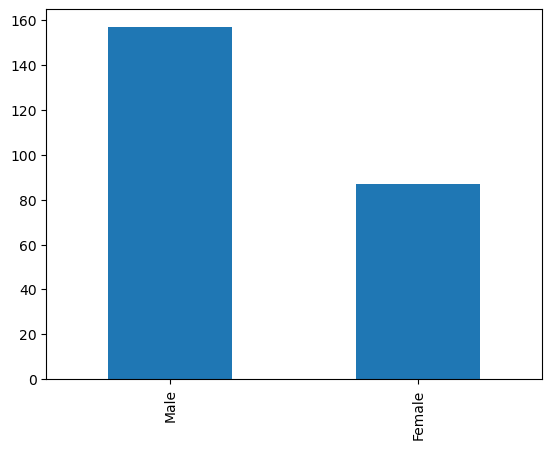

In [12]:
# Basic bar chart of the 'sex' variable with pandas

df_tips.sex.value_counts().plot.bar();

#df_tips.sex.value_counts().plot(kind='bar');

### Generating summary statistics for continuous variables

Counts are useful when we have a small number of categories, but with continuous data it is more helpful to summarize the
data in terms of its distribution. The most common way to do that is with mathematical functions that describe the range of
the data, its center, the degree to which it is concentrated or dispersed, and specific points that may be of interest (such as
the 90th percentile). Table 1 lists some pandas functions to calculate statistics for continuous variables (i.e., that operate on a numeric vector, such as a column with a numeric data type in a DataFrame).

#### Table 1: Distribution functions that operate on a numeric vector

| Describe | Function | Value |
| --- | --- | --- |
| Extremes | min(x) | Minimum value |
|  | max(x) | Maximum value |
| Central tendency | mean(x) | Arithmetic mean |
|  | median(x) | Median |
| Dispersion | var(x) | Variance around the mean |
|  | std(x) | Standard deviation (sqrt(var(x))) |
| Points | x.quantile(q=[...]) | Percentiles |

In [13]:
# Examples of using the distribution functions

df_tips.tip.min()
df_tips.tip.max()
df_tips.tip.mean()
df_tips.tip.median()
df_tips.tip.var()
df_tips.tip.std()
df_tips.tip.quantile(q=[0.25, 0.5, 0.75])

0.25    2.0000
0.50    2.9000
0.75    3.5625
Name: tip, dtype: float64

For skewed and asymmetric distributions, the arithmetic `mean()` and standard deviation (`std()`) may be misleading; in those cases, the `median()` and interquartile range (IQR, the range of the middle 50% of the data) are often more useful to summarize a distribution. The pandas library does not have a built-in IQR function, but we can define one and apply it to the 'tip' variable.

In [14]:
# Define the 'calculate_iqr' function

def calculate_iqr(x):
    return x.quantile(q=0.75) - x.quantile(q=0.25)

calculate_iqr(df_tips.tip)

1.5625

### Visualizing a continuous variable

__Histograms__  
A fundamental plot for a single continuous variable is the histogram. Such a plot can be produced using the `hist()` method
on a Series or a column of a DataFrame. A basic histogram is easy to make but the visual elements are less than pleasing, so we will next improve it by changing, among others, the title and axis labels by using several matplotlib.pyplot functions. Some of the most widely used functions are the following:
- plt.title('...') : sets the main title.
- plt.xlabel('...') : sets the x-axis label.
- plt.ylabel('...') : sets the y-axis label.
- plt.box(False) : removes the plot background.
- plt.grid(False) : removes the grid.
- plt.xticks() : sets the x-axis tick marks.
- plt.yticks() : sets the y-axis tick marks.
- plt.xlim() : specifies the x-axis range.
- plt.ylim() : specifies the y-axis range.
- density() : adds a smoothed estimation line.

And some of the most widely used arguments are:
- bins=NUM : call for NUM bars in the result.
- facecolor="..." : color the bars.
- edgecolor="..." : color the bar borders.
- density=True : using relative frequencies (i.e., the density estimate) instead of counts.

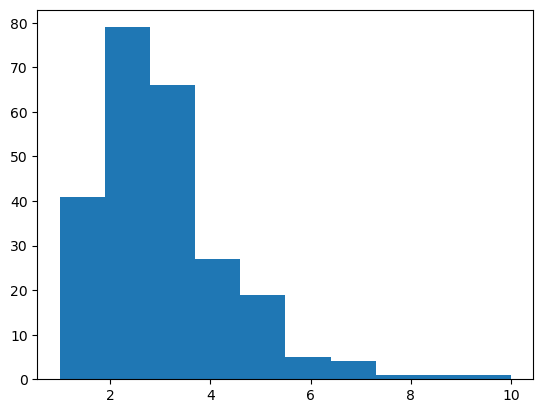

In [15]:
# Basic histogram of the 'tip' variable with matplotlib

plt.hist(df_tips.tip);

# Or with pandas: df_tips.tip.plot.hist();

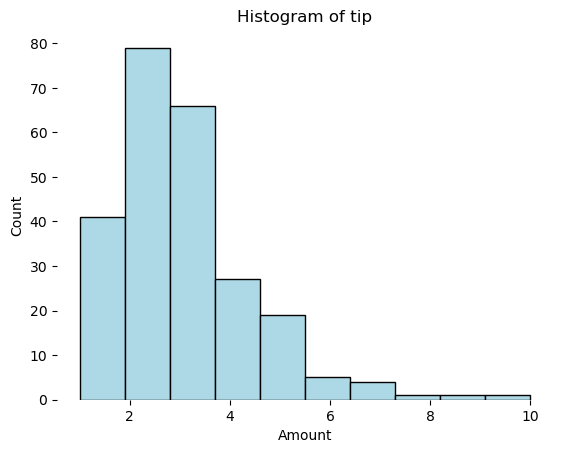

In [16]:
# Adjusted histogram of the 'tip' variable (displaying the counts) with matplotlib

plt.hist(df_tips.tip, bins=10,
         edgecolor='k',
         facecolor='lightblue')
plt.title("Histogram of tip")
plt.xlabel('Amount')
plt.ylabel('Count')
plt.box(False);

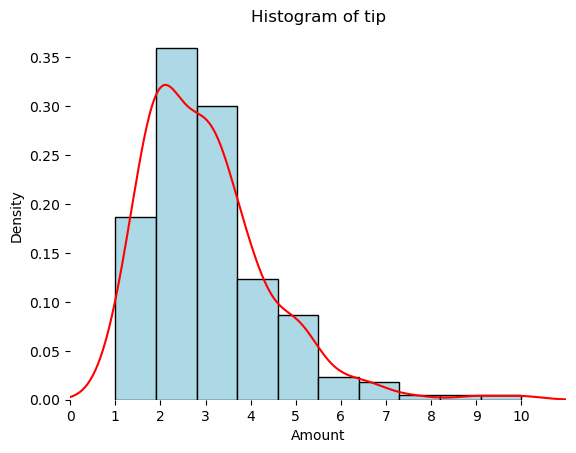

In [17]:
# Adjusted histogram of the 'tip' variable (displaying the relative frequencies) with matplotlib

plt.hist(df_tips.tip, bins=10,
         edgecolor='k',
         facecolor='lightblue',
         density=True)
plt.title("Histogram of tip")
plt.xlabel('Amount')
plt.ylabel('Density')
plt.box(False)
plt.xticks(range(int(df_tips['tip'].min()-1), int(df_tips['tip'].max()+1), 1))
plt.xlim((df_tips['tip'].min()-1, df_tips['tip'].max()+1))
df_tips.tip.plot.density(color='red');

__Boxplots__  
Boxplots are a compact way to represent a distribution. The `plot.box()` method from pandas is straightforward, and we can (for example) add labels, use the argument 'vert=False' to rotate the plot 90◦ to look better, and use sym=’k.’ to specify the outlier marker.

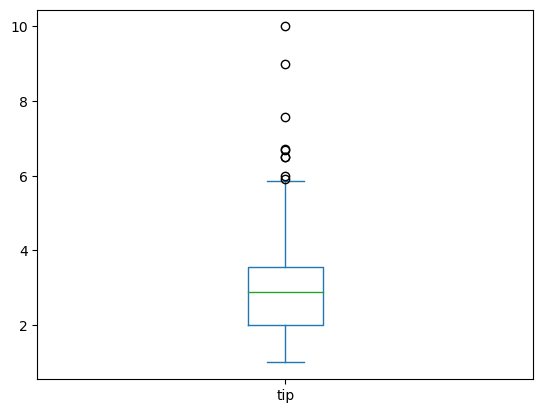

In [18]:
# Basic boxplot of the 'tip' variable with pandas

df_tips.tip.plot.box();

# Or with matplotlib: plt.boxplot(df_tips.tip);

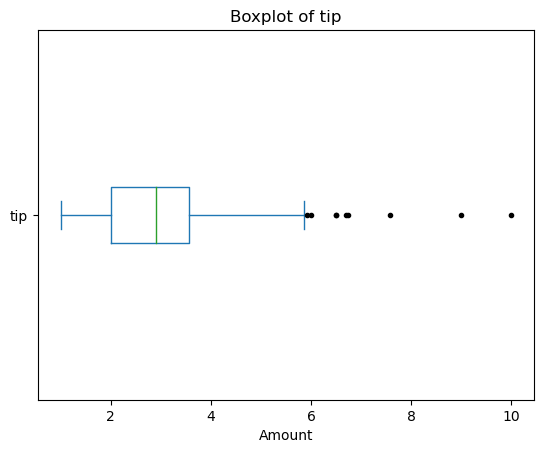

In [19]:
# Adjusted boxplot of the 'tip' variable with pandas

df_tips.tip.plot.box(vert=False, sym='k.')
plt.title('Boxplot of tip')
plt.xlabel('Amount');

Boxplots are even more useful when you use them to compare distributions by some other factor. The `boxplot()` method makes it easy to compare these with the 'by' argument, which specifies the column by which to group. The 'column' argument indicates the column represented by the boxplot distribution.

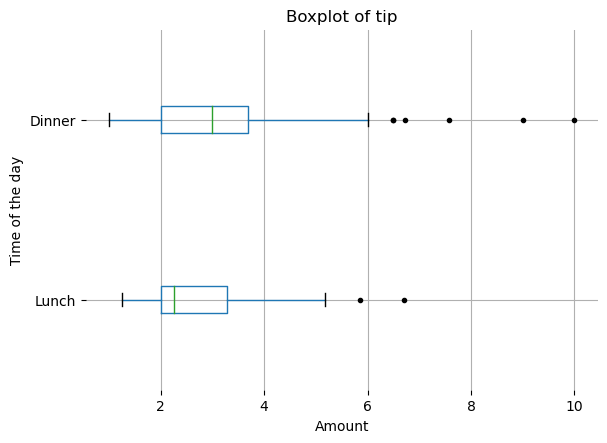

In [20]:
# Adjusted boxplot of the 'tip' variable by time of the day with pandas

df_tips.boxplot(column='tip', by='time', vert=False, sym='k.')
plt.suptitle('')
plt.title('Boxplot of tip')
plt.xlabel('Amount')
plt.ylabel('Time of the day')
plt.box(False);

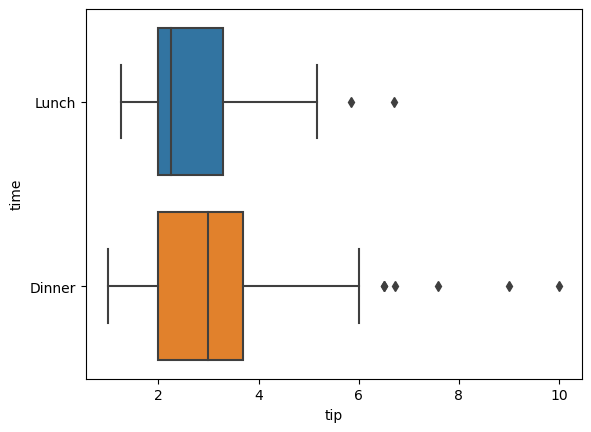

In [21]:
# Adjusted boxplot of the 'tip' variable by time of the day with seaborn

sns.boxplot(x=df_tips.tip, y=df_tips.time)
plt.show()

__QQ plot to check normality__  
Quantile-quantile (QQ) plots are a good way to check one’s data against a distribution that you think it should come from. Some common statistics such as correlation coefficients are interpreted under an assumption that data are normally distributed. A QQ plot can confirm that the distribution is, in fact, normal by plotting the observed quantiles of your data against the quantiles that would be expected for a normal distribution. To do this, you can use the `probplot()` function from the SciPy library, which compares data versus a specified distribution, for example the normal distribution.

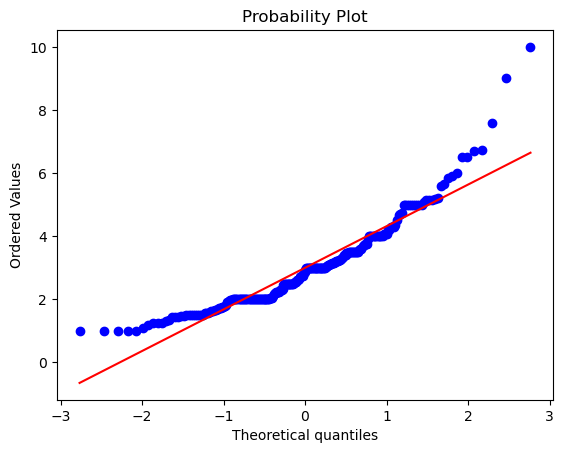

In [22]:
# QQ plot of the 'tip' variable with SciPy

stats.probplot(df_tips.tip, dist='norm', plot=plt);

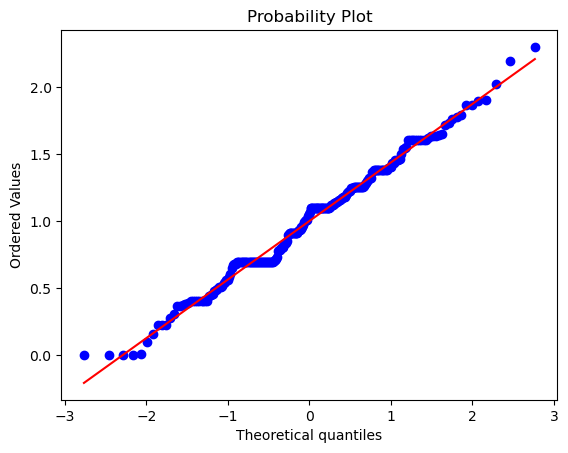

In [23]:
# QQ plot of the natural logarithm of the 'tips' variable with SciPy

stats.probplot(np.log(df_tips.tip), dist='norm', plot=plt);

## Bivariate statistics <a name="Wk3_c"></a>

Bivariate statistics refers to all statistical analyses in which the relationship between two variables is described and/or analyzed. In the latter case, bivariate statistical tests are used. Basically, three categories of such tests can be distinguished:
- Within-subjects tests : to compare two or more variables measured on related subjects.
- Between-subjects tests : to examine whether two or more subpopulations are identical with regard to:
  - a parameter (population mean, standard deviation or proportion), or
  - a distribution.
- Association measures : statistics that indicate to what extent two variables are associated.

The essential difference between the first two categories is that within-subjects tests are used when the units of analysis are related (i.e., not independent), whereas the between-subjects tests are used when the units of analysis are not related (i.e., independent). In this section, I will discuss some important and widely used statistical tests from each of the three categories.

### Within-subjects tests

Within-subjects tests are used to compare two or more variables measured on related subjects. That is, these tests are used when the units of analysis are related (i.e., not independent).

### Relationships between a categorical variable with two categories and a continuous variable

A t-test compares the mean of one sample against the mean of another sample (or against a specific value such as 0). The
important point is that it compares the mean for exactly two sets of data. The __dependent t-test for paired samples__ can be used to test whether two related or repeated samples have identical average (expected) values. So, for example, to test the following research question: Is there a difference in return on sales among S&P 500 firms between the years 2019 and 2020? In Python, we can use the `ttest_rel()` function from SciPy to conduct this test. The dependent t-test for paired samples has two underlying assumptions:
- The observations should be drawn from normally distributed populations.
- The measurement level of the dependent variable should be at least interval.

If these assumptions are not met, it may be possible to use the non-parametric alternative for this test, which is the __Wilcoxon signed-rank test__.

For more information about the `ttest_rel()` function, see: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html  
For more information about the `wilcoxon()` function, see: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.wilcoxon.html

In [24]:
# Import the data

df = pd.read_csv('data/data_ros_1920.csv')
df

,Data Year - Fiscal_19,Ticker Symbol,Company Name,Return on Sales_19,Data Year - Fiscal_20,Return on Sales_20
0,2019,AAL,AMERICAN AIRLINES GROUP INC,0.036838,2020,-0.512488
1,2019,PNW,PINNACLE WEST CAPITAL CORP,0.155081,2020,0.153488
2,2019,ABT,ABBOTT LABORATORIES,0.115565,2020,0.129883
3,2019,AMD,ADVANCED MICRO DEVICES,0.050661,2020,0.255045
4,2019,ALK,ALASKA AIR GROUP INC,0.087575,2020,-0.371284
...,...,...,...,...,...,...
435,2019,FBHS,FORTUNE BRANDS HOME & SECUR,0.074923,2020,0.090817
436,2019,XYL,XYLEM INC,0.076396,2020,0.052092
437,2019,CBRE,CBRE GROUP INC,0.053668,2020,0.031561
438,2019,LYB,LYONDELLBASELL INDUSTRIES NV,0.097619,2020,0.051166


In [25]:
# Display the column names

print(df.columns.tolist())

['Data Year - Fiscal_19', 'Ticker Symbol', 'Company Name', 'Return on Sales_19', 'Data Year - Fiscal_20', 'Return on Sales_20']


In [26]:
# Display summary statistics

df[['Return on Sales_19', 'Return on Sales_20']].describe().round(3).T

,count,mean,std,min,25%,50%,75%,max
Return on Sales_19,440.0,0.142,0.162,-0.719,0.066,0.115,0.203,1.638
Return on Sales_20,440.0,0.078,0.301,-3.135,0.043,0.104,0.181,1.514


In [27]:
# Use the dependent t-test for paired samples

stats.ttest_rel(df['Return on Sales_19'], df['Return on Sales_20'])

TtestResult(statistic=4.582062708140576, pvalue=6.008641386650885e-06, df=439)

In [28]:
# Display the output in a more readable format

ttest = stats.ttest_rel(df['Return on Sales_19'], df['Return on Sales_20'])
ttest_stat = (ttest[0].round(3))
ttest_pvalue = ("<0.01" if ttest[1] < 0.01 else (ttest[1].round(3)))
print(f"paired t-test statistic = {ttest_stat}; p-value = {ttest_pvalue}")

paired t-test statistic = 4.582; p-value = <0.01


The null hypothesis in this case is that, on average, there is no significant difference in return on sales among S&P 500 firms between the years 2019 and 2020. In this case, based on the *p*-value of <0.01, we reject the null hypothesis with “95% confidence.”

Before we can definitely draw this conclusion, however, we first have to test whether the assumptions of the parametric dependent t-test for paired samples are met, in particular whether the difference scores are normally distributed.

In [29]:
# Calculate the 'Difference in ROS' variable

df['Difference in ROS'] = df['Return on Sales_20'] - df['Return on Sales_19']
df

,Data Year - Fiscal_19,Ticker Symbol,Company Name,Return on Sales_19,Data Year - Fiscal_20,Return on Sales_20,Difference in ROS
0,2019,AAL,AMERICAN AIRLINES GROUP INC,0.036838,2020,-0.512488,-0.549326
1,2019,PNW,PINNACLE WEST CAPITAL CORP,0.155081,2020,0.153488,-0.001593
2,2019,ABT,ABBOTT LABORATORIES,0.115565,2020,0.129883,0.014318
3,2019,AMD,ADVANCED MICRO DEVICES,0.050661,2020,0.255045,0.204383
4,2019,ALK,ALASKA AIR GROUP INC,0.087575,2020,-0.371284,-0.458860
...,...,...,...,...,...,...,...
435,2019,FBHS,FORTUNE BRANDS HOME & SECUR,0.074923,2020,0.090817,0.015894
436,2019,XYL,XYLEM INC,0.076396,2020,0.052092,-0.024304
437,2019,CBRE,CBRE GROUP INC,0.053668,2020,0.031561,-0.022107
438,2019,LYB,LYONDELLBASELL INDUSTRIES NV,0.097619,2020,0.051166,-0.046453


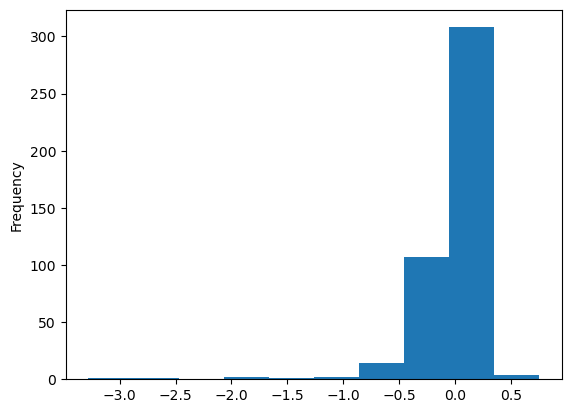

In [30]:
# Basic histogram of the 'Difference in ROS' variable with pandas

df['Difference in ROS'].plot.hist();

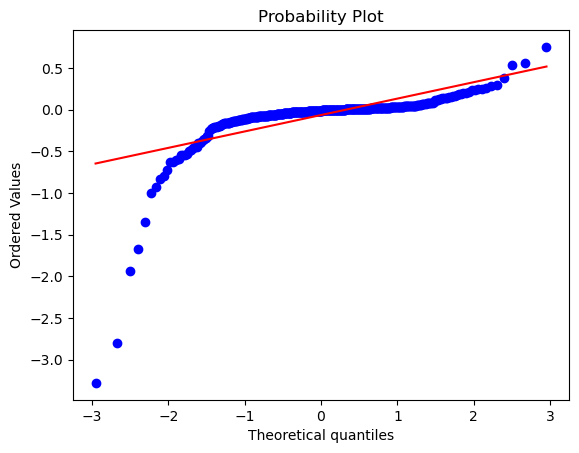

In [31]:
# Display the Q-Q plot for the 'Difference in ROS' variable with SciPy

stats.probplot(df['Difference in ROS'], dist="norm", plot=plt);

Overall, these plots clearly indicate that the normality assumption is not met. We can either solve this by doing a data transformation (more about this later) or by using a non-parametric test instead, which in case of the dependent t-test for paired samples would be the __Wilcoxon signed-rank test__. In Python, we can use the `wilcoxon()` function from SciPy to conduct this test.

In [32]:
# Use the Wilcoxon signed-rank test

stats.wilcoxon(df['Return on Sales_19'], df['Return on Sales_20'])

WilcoxonResult(statistic=32558.0, pvalue=2.2720899481232332e-09)

In [33]:
# Display the output in a more readable format

wilcoxon = stats.wilcoxon(df['Return on Sales_19'], df['Return on Sales_20'])
wilcoxon_stat = (wilcoxon[0].round(3))
wilcoxon_pvalue = ("<0.01" if wilcoxon[1] < 0.01 else (wilcoxon[1].round(3)))
print(f"wilcoxon signed-rank test statistic = {wilcoxon_stat}; p-value = {wilcoxon_pvalue}")

wilcoxon signed-rank test statistic = 32558.0; p-value = <0.01


Based on the Wilcoxon signed-rank test, which in this case seems to be the most appropriate one, given the *p*-value of <0.01, we would reject the null hypothesis and thus conclude that, on average, there is a significant difference in return on sales among S&P 500 firms between the years 2019 and 2020.

### Between-subjects tests

Between-subjects tests are used to examine whether two or more subpopulations are identical with regard to a parameter (population mean, standard deviation or proportion) or a distribution. That is, these tests are used when the units of analysis are unrelated (i.e., independent).

### Relationships between two categorical variables

The `crosstab()` function from pandas produces counts of observations at each level for two variables, i.e. a two-way crosstabulation. Alternatively, you can also use a combination of the `groupby()` and `unstack()` methods to produce this two-way crosstabulation. In this alternative approach, the `unstack()` method is not crucial, but pivots the multi-index series returned by the `groupby()` method into a DataFrame, which offers a more intuitive display of the data and simplifies downstream analysis.

In [34]:
# Create a two-way crosstabulation using the crosstab() function

pd.crosstab(df_tips.sex, df_tips.time)

time,Lunch,Dinner
sex,,
Male,33,124
Female,35,52


In [35]:
# Create a two-way crosstabulation using the groupby() and unstack() methods (1)

df_tips.groupby('sex').time.value_counts()

sex     time  
Male    Dinner    124
        Lunch      33
Female  Dinner     52
        Lunch      35
Name: time, dtype: int64

In [36]:
# Create a two-way crosstabulation using the groupby() and unstack() methods (2)

df_tips.groupby('sex').time.value_counts().unstack()

time,Dinner,Lunch
sex,,
Male,124,33
Female,52,35


In [37]:
# Create a two-way crosstabulation using the crosstab() function

pd.crosstab(df_tips.sex, df_tips.time, margins=True, margins_name='Total')

time,Lunch,Dinner,Total
sex,,,
Male,33,124,157
Female,35,52,87
Total,68,176,244


In general, a chi-square test determines whether the frequencies in cells are significantly different from what one would expect on the basis of their total counts. The __chi-square test of independence__ can be used to test whether two categorical variables in a contingency table (i.e., crosstabulation) are independent of each other. So, for example, to test the following research question using the 'tips' dataset: Are males and females just as likely to eat (or actually, pay the bill after eating) at the restaurant at lunch time and dinner time? In Python, we can use the `chi2_contingency()` function from SciPy to conduct this test. This test has two underlying assumptions:
- None of the expected frequencies are smaller than 1.
- No more than 20% of the expected frequencies are smaller than 5.

For more information about the `chi2_contingency()` function, see: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html

In [38]:
# Use the chi-square test of independence

dfObserved = pd.crosstab(df_tips.sex, df_tips.time)
stats.chi2_contingency(dfObserved.values)

Chi2ContingencyResult(statistic=9.343808982970623, pvalue=0.002237400118075248, dof=1, expected_freq=array([[ 43.75409836, 113.24590164],
       [ 24.24590164,  62.75409836]]))

In [39]:
# Obtain the different parts of the output

results = []

# Chi-square statistic, p-value, degrees of freedom, and the expected frequencies
results = stats.chi2_contingency(dfObserved.values)
chi2    = results[0] 
pvalue  = results[1]
free    = results[2]
efreq   = results[3]

dfExpected = pd.DataFrame(efreq, columns=dfObserved.columns, index=dfObserved.index)

# Display dfExpected
dfExpected

time,Lunch,Dinner
sex,,
Male,43.754098,113.245902
Female,24.245902,62.754098


In [40]:
# Display the output in a more readable format

print(f"chi-square test statistic = {chi2:.3f}; p-value = {pvalue:.3f}")

chi-square test statistic = 9.344; p-value = 0.002


The null hypothesis in this case is that the two categorical variables are unrelated (i.e. independent), i.e., that the counts in the cells are as one might expect from the marginal proportions. In this case, based on the *p*-value of 0.002, we reject the null hypothesis of independence between the two variables with “95% confidence.”

### Relationships between a categorical variable with two categories and a continuous variable

A t-test compares the mean of one sample against the mean of another sample (or against a specific value such as 0). The
important point is that it compares the mean for exactly two sets of data. The __t-test for two independent samples__ can be used to test whether two independent samples have identical average (expected) values. So, for example, to test the following research question using the 'tips' dataset: Is there a significant difference in tips between lunch time and dinner time? In Python, we can use the `ttest_ind()` function from SciPy to conduct this test. The t-test for two independent samples has four underlying assumptions:
-  The observations must be independent.
-  The observations should be drawn from normally distributed populations.
-  These populations should have equal variances.
-  The measurement level of the dependent variable should be at least interval.

The `ttest_ind()` function assumes that the populations have equal variances by default. If this assumption is not met, we can simply add the argument 'equal_var=False', and as a result perform __Welch’s t-test__, which does not assume that the populations have equal variances. Also, if the normality assumption is not met, it may be possible to use the non-parametric alternative for the t-test for two independent samples, which is the __Mann-Whitney test__.

For more information about the `ttest_ind()` function, see: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html  
For more information about the `mannwhitneyu()` function, see: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html

In [41]:
# Display summary statistics

df_tips.groupby('time').tip.describe()

,count,mean,std,min,25%,50%,75%,max
time,,,,,,,,
Lunch,68.0,2.728088,1.205345,1.25,2.0,2.25,3.2875,6.7
Dinner,176.0,3.102670,1.436243,1.00,2.0,3.00,3.6875,10.0


In [42]:
# Display summary statistics

df_tips.groupby('time').agg({'tip': [np.mean, np.std, np.size]})

tip               
            mean       std size
time                           
Lunch   2.728088  1.205345   68
Dinner  3.102670  1.436243  176

In [43]:
# Use the t-test for two independent samples (or Welch's t-test)

lunch = df_tips.tip[df_tips.time == 'Lunch']
dinner = df_tips.tip[df_tips.time == 'Dinner']

stats.ttest_ind(lunch, dinner, equal_var=True)  # t-test for two independent samples
#stats.ttest_ind(lunch, dinner, equal_var=False)  # Welch's t-test

Ttest_indResult(statistic=-1.9062569301202392, pvalue=0.05780153475171558)

In [44]:
# Display the output in a more readable format

ttest_ind = stats.ttest_ind(lunch, dinner, equal_var=True)
ttest_ind_stat = (ttest_ind[0].round(3))
ttest_ind_pvalue = ("<0.01" if ttest_ind[1] < 0.01 else (ttest_ind[1].round(3)))
print(f"independent t-test statistic = {ttest_ind_stat}; p-value = {ttest_ind_pvalue}")

independent t-test statistic = -1.906; p-value = 0.058


The null hypothesis in this case is that, on average, there is no significant difference in tips between lunch time and dinner time. In this case, based on the *p*-value of 0.058, we do not reject the null hypothesis with “95% confidence.”

Before we can definitely draw this conclusion, however, we first have to test whether the assumptions of the parametric t-test for two independent samples are met. Let's first test whether both populations have equal variances. In Python, we can use the `levene()` function from SciPy to conduct this test.

In [45]:
# Use the levene test

stats.levene(lunch, dinner, center='mean')

LeveneResult(statistic=0.4469478252669618, pvalue=0.5044251392890907)

In [46]:
# Display the output in a more readable format

levene = stats.levene(lunch, dinner, center='mean')
levene_stat = (levene[0].round(3))
levene_pvalue = ("<0.01" if levene[1] < 0.01 else (levene[1].round(3)))
print(f"Levene test statistic = {levene_stat}; p-value = {levene_pvalue}")

Levene test statistic = 0.447; p-value = 0.504


The null hypothesis in this case is that both populations have equal variances. In this case, based on the *p*-value of 0.504, we do not reject the null hypothesis with “95% confidence.” This means that the assumption of equal variances is met. The other assumption that we need to test is the normality assumption.

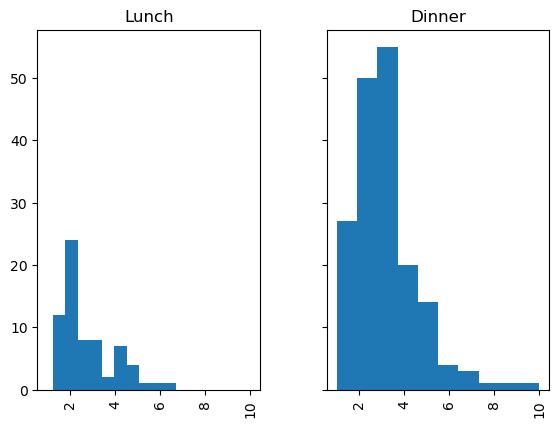

In [47]:
# Display the histograms for both samples with pandas

df_tips.tip.hist(by=df_tips.time, sharey=True, sharex=True);

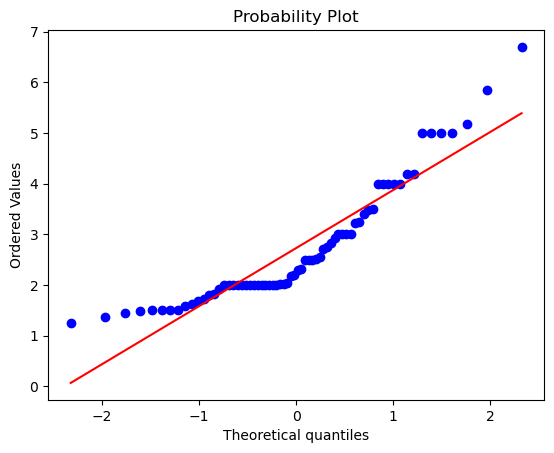

In [48]:
# Display the Q-Q plot for the 'lunch' sample with SciPy

stats.probplot(lunch, dist="norm", plot=plt);

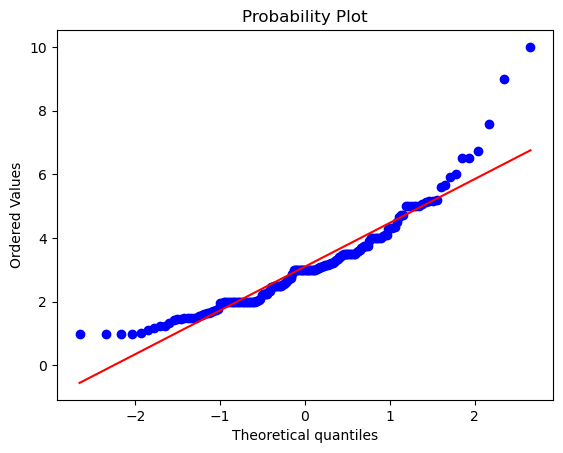

In [49]:
# Display the Q-Q plot for the 'dinner' sample with SciPy

stats.probplot(dinner, dist="norm", plot=plt);

In [50]:
# Test the skewness of the 'lunch' sample

stats.skewtest(lunch)

SkewtestResult(statistic=3.709534060944889, pvalue=0.00020764102301399384)

In [51]:
# Display the output in a more readable format

skew = stats.skewtest(lunch)
skew_stat = (skew[0].round(3))
skew_pvalue = ("<0.01" if skew[1] < 0.01 else (skew[1].round(3)))
print(f"skewtest statistic = {skew_stat}; p-value = {skew_pvalue}")

skewtest statistic = 3.71; p-value = <0.01


In [52]:
# Test the kurtosis of the 'lunch' sample

stats.kurtosistest(lunch)

KurtosistestResult(statistic=1.643711009142367, pvalue=0.10023591080813385)

In [53]:
# Display the output in a more readable format

kurt = stats.kurtosistest(lunch)
kurt_stat = (kurt[0].round(3))
kurt_pvalue = ("<0.01" if kurt[1] < 0.01 else (kurt[1].round(3)))
print(f"kurtosistest statistic = {kurt_stat}; p-value = {kurt_pvalue}")

kurtosistest statistic = 1.644; p-value = 0.1


In [54]:
# Use the normality test on the 'lunch' sample

stats.normaltest(lunch)

NormaltestResult(statistic=16.462428830886097, pvalue=0.00026621284088202676)

In [55]:
# Display the output in a more readable format

norm = stats.normaltest(lunch)
norm_stat = (norm[0].round(3))
norm_pvalue = ("<0.01" if norm[1] < 0.01 else (norm[1].round(3)))
print(f"normaltest statistic = {norm_stat}; p-value = {norm_pvalue}")

normaltest statistic = 16.462; p-value = <0.01


In [56]:
# Test the skewness of the 'dinner' sample

stats.skewtest(dinner)

SkewtestResult(statistic=6.343458600760778, pvalue=2.2466336509080644e-10)

In [57]:
# Display the output in a more readable format

skew = stats.skewtest(dinner)
skew_stat = (skew[0].round(3))
skew_pvalue = ("<0.01" if skew[1] < 0.01 else (skew[1].round(3)))
print(f"skewtest statistic = {skew_stat}; p-value = {skew_pvalue}")

skewtest statistic = 6.343; p-value = <0.01


In [58]:
# Test the kurtosis of the 'dinner' sample

stats.kurtosistest(dinner)

KurtosistestResult(statistic=4.656101749322831, pvalue=3.2225271963025848e-06)

In [59]:
# Display the output in a more readable format

kurt = stats.kurtosistest(dinner)
kurt_stat = (kurt[0].round(3))
kurt_pvalue = ("<0.01" if kurt[1] < 0.01 else (kurt[1].round(3)))
print(f"kutosistest statistic = {kurt_stat}; p-value = {kurt_pvalue}")

kutosistest statistic = 4.656; p-value = <0.01


In [60]:
# Use the normality test on the 'dinner' sample

stats.normaltest(dinner)

NormaltestResult(statistic=61.91875051961301, pvalue=3.585206387430502e-14)

In [61]:
# Display the output in a more readable format

norm = stats.normaltest(dinner)
norm_stat = (norm[0].round(3))
norm_pvalue = ("<0.01" if norm[1] < 0.01 else (norm[1].round(3)))
print(f"normaltest statistic = {norm_stat}; p-value = {norm_pvalue}")

normaltest statistic = 61.919; p-value = <0.01


Overall, these plots and statistics clearly indicate that the normality assumption is not met. We can either solve this by doing a data transformation (more about this later) or by using a non-parametric test instead, which in case of the t-test for two independent samples would be the __Mann-Whitney test__. In Python, we can use the `mannwhitneyu()` function from SciPy to conduct this test.

In [62]:
# Use the Mann-Whitney test

stats.mannwhitneyu(lunch, dinner)

MannwhitneyuResult(statistic=4905.0, pvalue=0.028828045676793167)

In [63]:
# Display the output in a more readable format

mannwhitneyu = stats.mannwhitneyu(lunch, dinner)
mannwhitneyu_stat = (mannwhitneyu[0].round(3))
mannwhitneyu_pvalue = ("<0.01" if mannwhitneyu[1] < 0.01 else (mannwhitneyu[1].round(3)))
print(f"mann-whitney test statistic = {mannwhitneyu_stat}; p-value = {mannwhitneyu_pvalue}")

mann-whitney test statistic = 4905.0; p-value = 0.029


Based on the Mann-Whitney test, which in this case seems to be the most appropriate one, given the *p*-value of 0.014, we would reject the null hypothesis and thus conclude that there is a significant difference in tips between lunch time and dinner time.

### Relationships between a categorical variable with more than two categories and a continuous variable

The __one-way ANOVA test__ tests the null hypothesis that two or more groups have the same population mean. The test is applied to samples from two or more groups, possibly with differing sizes. So, for example, to test the following research question using the 'tips' dataset: Is there a significant difference in tips between the four days of the week? In Python, we can use the `f_oneway()` function from SciPy to conduct this test. The one-way anova test has four underlying assumptions:
-  The observations must be independent.
-  The observations should be drawn from normally distributed populations.
-  These populations should have equal variances.
-  The measurement level of the dependent variable should be at least interval.

Given that these assumptions are exactly the same as for the t-test for two independent samples, you can use the same plots and tests to examine these assumptions. (This (important) step will therefore be skipped in this notebook.) If the assumptions are not met, it may be possible to use the non-parametric alternative for the one-way anova test, which is the __Kruskal-Wallis test__.

For more information about the `f_oneway()` function, see: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html  
For more information about the `kruskal()` function, see: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kruskal.html

In [64]:
# Use the one-way anova test

stats.f_oneway(df_tips.tip[df_tips.day == 'Thur'],
               df_tips.tip[df_tips.day == 'Fri'],
               df_tips.tip[df_tips.day == 'Sat'],
               df_tips.tip[df_tips.day == 'Sun'])

F_onewayResult(statistic=1.6723551980998699, pvalue=0.1735885553040592)

In [65]:
# Display the output in a more readable format

thur = df_tips.tip[df_tips.day == 'Thur']
fri = df_tips.tip[df_tips.day == 'Fri']
sat = df_tips.tip[df_tips.day == 'Sat']
sun = df_tips.tip[df_tips.day == 'Sun']

f_oneway = stats.f_oneway(thur, fri, sat, sun)
f_oneway_stat = (f_oneway[0].round(3))
f_oneway_pvalue = ("<0.01" if f_oneway[1] < 0.01 else (f_oneway[1].round(3)))
print(f"one-way anova statistic = {f_oneway_stat}; p-value = {f_oneway_pvalue}")

one-way anova statistic = 1.672; p-value = 0.174


The null hypothesis in this case is that, on average, there is no significant difference in tips between the four days of the week. In this case, based on the *p*-value of 0.174, we do not reject the null hypothesis with “95% confidence.”

In [66]:
# Use the Kruskal-Wallis test

stats.kruskal(df_tips.tip[df_tips.day == 'Thur'],
              df_tips.tip[df_tips.day == 'Fri'],
              df_tips.tip[df_tips.day == 'Sat'],
              df_tips.tip[df_tips.day == 'Sun'])

KruskalResult(statistic=8.565587588927167, pvalue=0.03566056019447427)

In [67]:
# Display the output in a more readable format

kruskal = stats.kruskal(thur, fri, sat, sun)
kruskal_stat = (kruskal[0].round(3))
kruskal_pvalue = ("<0.01" if kruskal[1] < 0.01 else (kruskal[1].round(3)))
print(f"kruskal-wallis statistic = {kruskal_stat}; p-value = {kruskal_pvalue}")

kruskal-wallis statistic = 8.566; p-value = 0.036


Based on the Kruskal-Wallis test, given the *p*-value of 0.036, we would reject the null hypothesis and thus conclude that there is a significant difference in tips between the four days of the week. The different conclusion compared to the one-way anova test suggests that it is likely that the underlying assumptions of the latter test are not met.

### Association measures

Association measures are statistics that indicate to what extent two variables are associated.

### Relationships between two continuous variables

Before statistically analyzing a relationship between two continuous variables, it is typically informative to first explore this relationship using data visualizations (i.e., a scatterplot).

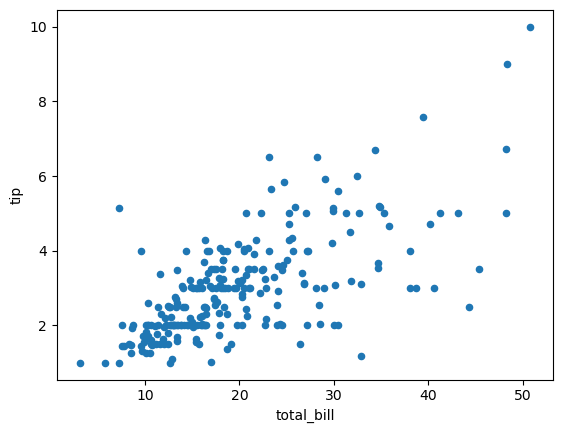

In [68]:
# Display the basic scatterplot with pandas

df_tips.plot.scatter('total_bill', 'tip');

#df_tips.plot(kind='scatter', x='total_bill', y='tip');

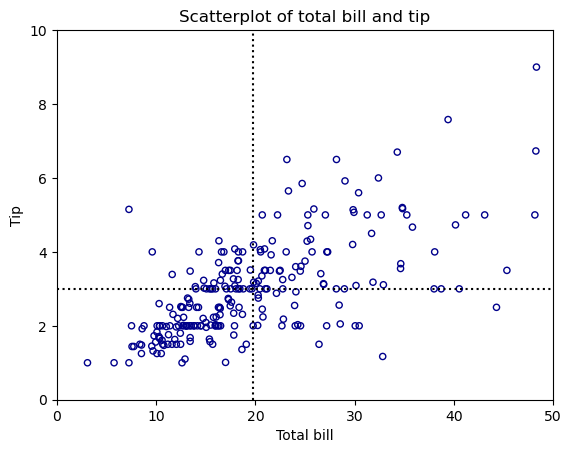

In [69]:
# Display a more informative scatterplot with pandas

df_tips.plot(kind='scatter',
             x='total_bill',
             y='tip',
             c='none',
             edgecolor='darkblue',
             xlim=[0, 50],
             ylim=[0, 10])
plt.plot([0, 50], [df_tips.tip.mean(),
                   df_tips.tip.mean()], 'k:')
plt.plot([df_tips.total_bill.mean(), df_tips.total_bill.mean()],
         [0, 10], 'k:')
plt.title('Scatterplot of total bill and tip')
plt.xlabel('Total bill')
plt.ylabel('Tip');

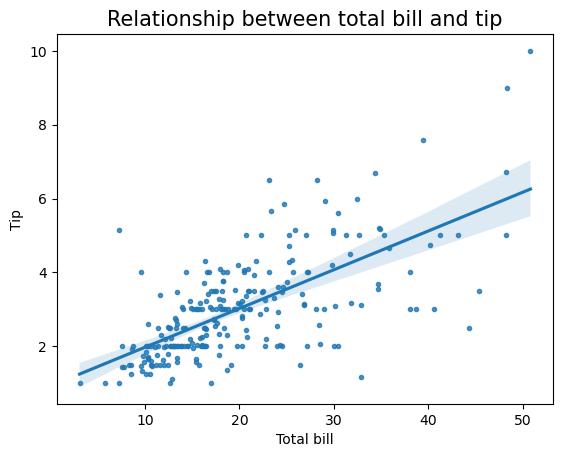

In [70]:
# Display a more informative scatterplot with seaborn

sns.regplot(x='total_bill', y='tip', data=df_tips,  marker='.')
plt.xlabel('Total bill')
plt.ylabel('Tip')
plt.title("Relationship between total bill and tip", fontsize=15);

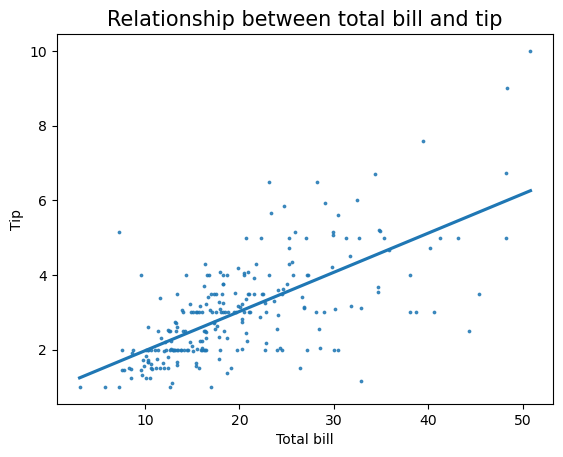

In [71]:
# Display a more informative scatterplot with seaborn

sns.regplot(x='total_bill', y='tip', data=df_tips, scatter_kws={'s':3}, ci=False)
plt.xlabel('Total bill')
plt.ylabel('Tip')
plt.title("Relationship between total bill and tip", fontsize=15);

The most widely used association measure is the __Pearson correlation coefficient__. The Pearson correlation coefficient measures the linear relationship between two continuous variables. So it can, for example, be used to test the following research question using the 'tips' dataset: Is there a significant relationship between the total bill amounts and the paid tips? Like other correlation coefficients, this one varies between -1 and +1 with 0 implying no correlation. Correlations of -1 or +1 imply an exact linear relationship. Positive correlations imply that as x increases, so does y. Negative correlations imply that as x increases, y decreases. In Python, we can use the `pearsonr()` function from SciPy to conduct this test. The Pearson correlation coefficent has four underlying assumptions:
-  The observations must be independent.
-  The observations should be drawn from normally distributed populations.
-  The relationship between the two continuous variables is linear.
-  The measurement level of the dependent variable should be at least interval.

If these assumptions are not met, it may be possible to use the non-parametric alternative for the Pearson correlation coefficient, which is the __Spearman correlation coefficient__.

For more information about the `pearsonr()` function, see: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html  
For more information about the `spearmanr()` function, see: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html

In [72]:
# Calculate the Pearson correlation with pandas

df_tips.total_bill.corr(df_tips.tip)

0.6757341092113641

In [73]:
# Calculate the Pearson correlation with SciPy

stats.pearsonr(df_tips.total_bill, df_tips.tip)

PearsonRResult(statistic=0.6757341092113645, pvalue=6.692470646863477e-34)

In [74]:
# Display the output in a more readable format

pearsonr = stats.pearsonr(df_tips.total_bill, df_tips.tip)
pearsonr_stat = (pearsonr[0].round(3))
pearsonr_pvalue = ("<0.01" if pearsonr[1] < 0.01 else (pearsonr[1].round(3)))
print(f"Pearson r statistic = {pearsonr_stat}; p-value = {pearsonr_pvalue}")

Pearson r statistic = 0.676; p-value = <0.01


Based on the Pearson correlation coefficient, given the *p*-value of <0.01, we would reject the null hypothesis and thus conclude that there is a significant relationship between the total bill amounts and the paid tips.

In [75]:
# Calculate the Spearman correlation with SciPy

from scipy.stats import spearmanr
spearmanr(df_tips.total_bill, df_tips.tip)

SignificanceResult(statistic=0.6789681219001009, pvalue=2.501158440923619e-34)

In [76]:
# Display the output in a more readable format

spearmanr = spearmanr(df_tips.total_bill, df_tips.tip)
spearmanr_stat = (spearmanr[0].round(3))
spearmanr_pvalue = ("<0.01" if spearmanr[1] < 0.01 else (spearmanr[1].round(3)))
print(f"Spearman r statistic = {spearmanr_stat}; p-value = {spearmanr_pvalue}")

Spearman r statistic = 0.679; p-value = <0.01


Based on the Spearman correlation coefficient, given the *p*-value of <0.01, we would reject the null hypothesis and thus conclude that there is a significant relationship between the total bill amounts and the paid tips.

Instead of calculating the correlation coefficient between just two variables, you can also calculate the correlation coefficients among all continuous variables (i.e., all columns with a numeric data type in a DataFrame) simultaneously.

In [77]:
# Calculate the correlation coefficients among all continuous variables using pandas

df_tips.corr(method='pearson')
#df_tips.corr(method='spearman')

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


## Potential remedies for violation of the normality assumption <a name="Wk3_d"></a>

An important assumption for many statistical tests is the normality assumption. There are many approaches for handling a situation in which this assumption is not met, such as using a non-parametric alternative instead of a parametric statistical test. Two other widely used approaches are:
- winsorizing : With this approach, the extreme values, or outliers, are all set to a specified percentile (or to specified percentiles) of the data. In Python, we can use the `mstats.winsorize()` function from SciPy to winsorize a continuous variable, where the (limits[0])th lowest values are set to the (limits[0])th percentile, and the (limits[1])th highest values are set to the (1 - limits[1])th percentile.
- data transformations : With this approach, the data are transformed, for example by calculating their natural logarithm. An important point of attention with logarithmic transformations is that observations may be treated differently depending on their value. More specifically, the logarithm of negative values and 0 doesn't exist, and positive values are treated differently when calculating their logarithm depending on whether they are smaller or larger than 1. Below, following recommendations by methodologists, I define a function ('natural_log') that avoids these potential problems by, if necessary, shifting a variable's distribution such that its minimum value becomes 1 before calculating its natural logarithm.




For more information about the `mstats.winsorize()` function, see: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mstats.winsorize.html

In [78]:
# Create a new variable ('tip_wins') by winsorizing the 'tip' variable

df_tips['tip_wins'] = stats.mstats.winsorize(df_tips.tip, limits=[0.05, 0.05])
df_tips

,total_bill,tip,sex,smoker,day,time,size,tip_wins
0,16.99,1.01,Female,No,Sun,Dinner,2,1.44
1,10.34,1.66,Male,No,Sun,Dinner,3,1.66
2,21.01,3.50,Male,No,Sun,Dinner,3,3.50
3,23.68,3.31,Male,No,Sun,Dinner,2,3.31
4,24.59,3.61,Female,No,Sun,Dinner,4,3.61
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,5.20
240,27.18,2.00,Female,Yes,Sat,Dinner,2,2.00
241,22.67,2.00,Male,Yes,Sat,Dinner,2,2.00
242,17.82,1.75,Male,No,Sat,Dinner,2,1.75


In [79]:
# Display summary statistics

df_tips[['tip', 'tip_wins']].describe().round(3).T

,count,mean,std,min,25%,50%,75%,max
tip,244.0,2.998,1.384,1.00,2.0,2.9,3.562,10.0
tip_wins,244.0,2.932,1.134,1.44,2.0,2.9,3.562,5.2


In [80]:
# Define the 'natural_log' function

def natural_log(x):
    if min(x) < 1:
        if min(x) < 0:
            x += (min(x)*-1) + 1
        else:
            x += (1 - min(x))
    return np.log(x)

In [81]:
# Create a new variable ('tip_ln') by transforming the 'tip' variable

df_tips['tip_ln'] = natural_log(df_tips.tip)
df_tips

,total_bill,tip,sex,smoker,day,time,size,tip_wins,tip_ln
0,16.99,1.01,Female,No,Sun,Dinner,2,1.44,0.009950
1,10.34,1.66,Male,No,Sun,Dinner,3,1.66,0.506818
2,21.01,3.50,Male,No,Sun,Dinner,3,3.50,1.252763
3,23.68,3.31,Male,No,Sun,Dinner,2,3.31,1.196948
4,24.59,3.61,Female,No,Sun,Dinner,4,3.61,1.283708
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,5.20,1.778336
240,27.18,2.00,Female,Yes,Sat,Dinner,2,2.00,0.693147
241,22.67,2.00,Male,Yes,Sat,Dinner,2,2.00,0.693147
242,17.82,1.75,Male,No,Sat,Dinner,2,1.75,0.559616


In [82]:
# Display summary statistics

df_tips[['tip', 'tip_ln']].describe().round(3).T

,count,mean,std,min,25%,50%,75%,max
tip,244.0,2.998,1.384,1.0,2.000,2.900,3.562,10.000
tip_ln,244.0,1.003,0.436,0.0,0.693,1.065,1.270,2.303


## Application of basic statistical analysis - Anomaly detection <a name="Wk3_e"></a>

Anomaly detection refers to the process of "searching for and identifying examples of atypical data in a dataset. These nonconforming cases are often referred to as *anomalies* or *outliers*. This process is often used in analyzing financial transactions to identify potential fraudulent activities and to trigger investigations." (Kelleher and Tierney, 2018, p. 239). Anomaly detection does not necessarily involve a single or a few cases in a dataset, but can also involve a larger subset or even the overall pattern of the data. A good example that is regularly used for accounting fraud detection is what is known as Benford's law. As explained on Wikipedia, "Benford's law is an observation about the frequency distribution of leading digits in many real-life sets of numerical data. The law states that in many naturally occurring collections of numbers, the leading digit is likely to be small. In sets that obey the law, the number 1 appears as the leading significant digit about 30% of the time, while 9 appears as the leading significant digit less than 5% of the time. If the digits were distributed uniformly, they would each occur about 11.1% of the time. Benford's law also makes predictions about the distribution of second digits, third digits, digit combinations, and so on." More specifically, Benford's Law is based on base-10 logarithms that show the probability that the leading digit(s) of a number will be n (i.e., P(n)) can be calculated as __log10(1+1/n)__.

In addition to Benford's law, which involves the frequency distribution of the first digit(s) in sets of numerical data, there can also be other patterns of interest, for example ones that involve the frequency distribution of the last digit(s) in sets of numerical data. That is, depending on the kind of operations and selling prices of a firm, one may have expections about the frequency distribution of the last digit(s) of (for instance) the sales revenue of individual transactions in a period. For example, given that a transaction at a supermarket typically involves multiple products and selling prices with different last digits, one may expect to find a uniform distribution when analyzing the frequency distribution of the last digit(s) of the sales revenue of all transactions in a period. On the other hand, given that a transaction at an electronics shop typically involves one product and selling prices with a 5 or 9 as the last digit, in such a firm, one may expect to find a different distribution when analyzing the frequency distribution of the last digit(s) of the sales revenue of all transactions in a period.

I will first show how Python codes can be used to analyze whether the frequency distribution of a variable is consistent with Benford's law or not, where I will focus on the first two digits of the values of this variable. Next, I will show how Python codes can be used to analyze whether the frequency distribution of a variable is consistent with a uniform distribution or not, where I will focus on the last digit of the values of this variable. The dataset that I will analyze contains the expenditures (amounts) by employees of a small firm during the year 2020.

In [83]:
# Import the data

df_exp = pd.read_csv('data/expenditures_adj.csv')
df_exp.head()

,exp_no,employee_no,date,amount
0,E00001,Emp0013,2020-01-03,586
1,E00002,Emp0016,2020-01-04,289
2,E00003,Emp0005,2020-01-05,73
3,E00004,Emp0004,2020-01-07,118
4,E00005,Emp0008,2020-01-07,97


### Benford's law (first two digits)

Let's now first analyze whether the frequency distribution of the 'amount' variable is consistent with Benford's law or not, when focussing on the first two digits of the values of this variable, both statistically and graphically.

In [84]:
# Statistically analyze consistency with Benford's law (first two digits)

import math

obs = df_exp['amount']

#Create a list of the first two digits of the amounts
def first_two_digits(num):
    return int(str(num)[:2])
obs = [first_two_digits(n) for n in obs]

#Create a dictionary with the observed frequencies (counts)
dict1 = {x: 0 for x in range(10, 100)}
for num in obs:
    dict1[num] += 1

#Calculate the number of observations and assign it to a variable
n = len(obs)

#Create a dictionary with the expected frequencies
dict2 = {x: round(n * math.log10(1+(1/x)), 0) for x in range(10, 100)}

#Convert the dictionaries to lists
obs = list(dict1.values())
exp = list(dict2.values())
x = list(dict2.keys())

#Print the observed and expected frequencies
print(obs)
print(exp)

#Normalize the data such that the observed and expected frequencies have the same sum
if sum(obs) != sum(exp):
    exp = [i * (sum(obs)/sum(exp)) for i in exp]

#Test for differences using the one-sample Chi-Square test
stats.chisquare(obs, f_exp=exp)

[22, 9, 6, 6, 1, 0, 1, 0, 4, 0, 2, 1, 2, 0, 0, 1, 5, 0, 2, 0, 2, 0, 0, 0, 0, 0, 1, 1, 1, 3, 0, 2, 0, 2, 3, 8, 16, 14, 23, 27, 17, 8, 5, 3, 2, 1, 1, 1, 3, 0, 2, 2, 1, 1, 2, 8, 0, 0, 3, 1, 3, 1, 2, 3, 2, 2, 2, 6, 4, 3, 3, 1, 5, 2, 1, 3, 6, 5, 2, 4, 4, 3, 3, 3, 6, 1, 6, 6, 6, 7]
[14.0, 13.0, 12.0, 11.0, 10.0, 9.0, 9.0, 8.0, 8.0, 7.0, 7.0, 7.0, 6.0, 6.0, 6.0, 6.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 1.0, 1.0, 1.0, 1.0]


Power_divergenceResult(statistic=833.5973056148283, pvalue=2.509199836127928e-121)

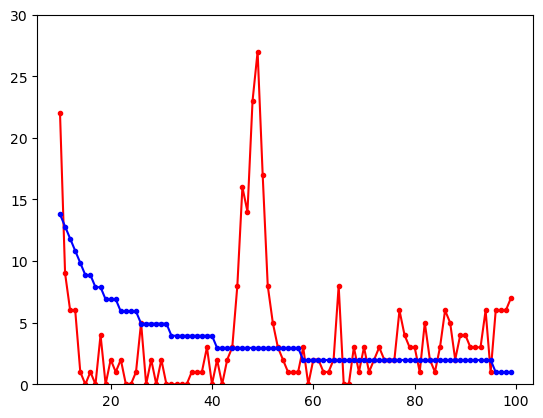

In [85]:
# Graphically analyze consistency with Benford's law (first two digits)

plt.plot(x, obs, c='r', marker= '.')
plt.plot(x, exp, c='b', marker= '.')
plt.ylim(0, 30);

Based on these analyses, one can conclude that the frequency distribution of the 'amount' variable is not consistent with Benford's law, when focussing on the first two digits of the values of this variable. The one-sample Chi-Square test indicates that the frequency distribution of the amounts is statistically significantly different from the frequency distribution that is consistent with Benford's law. The graph illustrates the difference, showing that the two distributions in particular deviate for values around 50. These findings may trigger a further investigation of these expenditures.

### Uniform distribution (last digit)

Let's now analyze whether the frequency distribution of the 'amount' variable is consistent with a uniform distribution or not, when focussing on the last digit of the values of this variable, both statistically and graphically.

In [86]:
# Statistically analyze consistency with uniform distribution (last digit)

obs = df_exp['amount']

#Create a list of the last digit of the amounts
obs = [num % 10 for num in obs]

#Create a dictionary with the observed frequencies (counts)
dict1 = {x: 0 for x in range(0, 10)}
for num in obs:
    dict1[num] += 1

#Calculate the number of observations and assign it to a variable
n = len(obs)

#Create a dictionary with the expected frequencies
dict2 = {x: round(n * 0.1, 1) for x in range(0, 10)}

#Convert the dictionaries to lists
obs = list(dict1.values())
exp = list(dict2.values())
x = list(dict1.keys())

#Print the observed and expected frequencies
print(obs)
print(exp)

#Test for differences using the one-sample Chi-Square test
stats.chisquare(obs, f_exp=exp)

[37, 35, 35, 38, 29, 30, 27, 34, 36, 30]
[33.1, 33.1, 33.1, 33.1, 33.1, 33.1, 33.1, 33.1, 33.1, 33.1]


Power_divergenceResult(statistic=3.894259818731117, pvalue=0.9182331212646249)

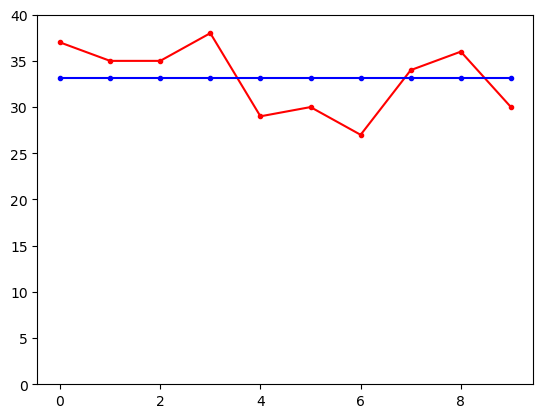

In [87]:
# Graphically analyze consistency with uniform distribution (last digit)

plt.plot(x, obs, c='r', marker= '.')
plt.plot(x, exp, c='b', marker= '.')
plt.ylim(0, 40);

Based on these analyses, one can conclude that the frequency distribution of the 'amount' variable is consistent with a uniform distribution, when focussing on the last digit of the values of this variable. The one-sample Chi-Square test indicates no statistically significantly difference between the frequency distribution of the amounts and a uniform frequency distribution. The graph illustrates this further, by showing only small deviations between the two distributions.